In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [140]:
# define protein 

proteins = {'DCV' : {
    "1A": (799, 1089),
    "2A": (1092, 1161),
    "2B": (1164, 1587),
    "2C": (1590, 2901),
    "3A": (2904, 3501),
    "3C": (3504, 4422),
    "RdRp": (4425, 6072),
    "VP2": (6267, 7110),
    "VP4": (7113, 7281),
    "VP3": (7284, 8175),
    "VP1": (8175, 8970),
}, 
            'CrPV': {
    "1A": (709, 1206),
    "2A": (1207, 1278),
    "2B": (1279, 1692),
    "2C": (1693, 2925),
    "3A": (2926, 3361),
    "3B": (3364, 3432),
    "3C": (3433, 4368),
    "RdRp": (4369, 6022),
    "VP1": (6217, 7065),
    "VP4": (7066, 7236),
    "VP2": (7237, 8121),
    "VP3": (8122, 8902),
}
           }

In [141]:
length_crpv = 9185
length_coding = 8902 - 709
protein_2B = proteins['CrPV']['2B'][1] - proteins['CrPV']['2B'][0]
protein_2B/length_coding

0.050408885634077874

In [142]:
# load diveristy 

fname = "all_snpgenie_site_results.csv"
df = pd.read_csv(fname)

In [143]:
df_pis_protein = pd.DataFrame() 

for virus in ['CrPV']:
    for sample in df['passage'].unique():
        proteins_virus = proteins[virus]
        for protein in proteins_virus.items():
            protein_id = protein[0]
            protein_start = protein[1][0]
            protein_end = protein[1][1]
            protein_length = protein_end - protein_start

            df_temp = df[df['virus']== virus]
            df_temp = df_temp[df_temp['passage']==sample]
            df_temp = df_temp[df_temp['site'].isin(list(range(protein_start,protein_end+1 )))]
            avg_pi = df_temp['pi'].sum()/protein_length

            mean_pis = {
                        'virus': [virus], 
                        'sample': sample, 
                        'protein': protein_id,
                        'avg_pi': avg_pi, 
                    }

            df_pis_protein = pd.concat([pd.DataFrame(mean_pis),df_pis_protein], ignore_index=True)

In [144]:
df_pis_protein['genotype'] = df_pis_protein['sample'].str.split("_").str[0]
df_pis_protein['rep'] = df_pis_protein['sample'].str.split("_").str[-1]
df_pis_protein['passage'] = df_pis_protein['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)

df_pis_protein.head()

,virus,sample,protein,avg_pi,genotype,rep,passage
0,CrPV,W_p10_c,VP3,0.000278,W,c,10
1,CrPV,W_p10_c,VP2,0.000316,W,c,10
2,CrPV,W_p10_c,VP4,0.000104,W,c,10
3,CrPV,W_p10_c,VP1,0.000114,W,c,10
4,CrPV,W_p10_c,RdRp,0.000195,W,c,10


In [145]:
df_pis_protein['genotype'].unique()

array(['W', 'I', 'K', 'parental'], dtype=object)

In [146]:
df_pis_protein[df_pis_protein['genotype']=='parental']

,virus,sample,protein,avg_pi,genotype,rep,passage
540,CrPV,parental_p0_vs_p0,VP3,0.000754,parental,p0,0
541,CrPV,parental_p0_vs_p0,VP2,0.000038,parental,p0,0
542,CrPV,parental_p0_vs_p0,VP4,0.000130,parental,p0,0
543,CrPV,parental_p0_vs_p0,VP1,0.000031,parental,p0,0
544,CrPV,parental_p0_vs_p0,RdRp,0.000450,parental,p0,0
545,CrPV,parental_p0_vs_p0,3C,0.000093,parental,p0,0
546,CrPV,parental_p0_vs_p0,3B,0.000039,parental,p0,0
547,CrPV,parental_p0_vs_p0,3A,0.000093,parental,p0,0
548,CrPV,parental_p0_vs_p0,2C,0.000147,parental,p0,0
549,CrPV,parental_p0_vs_p0,2B,0.000127,parental,p0,0


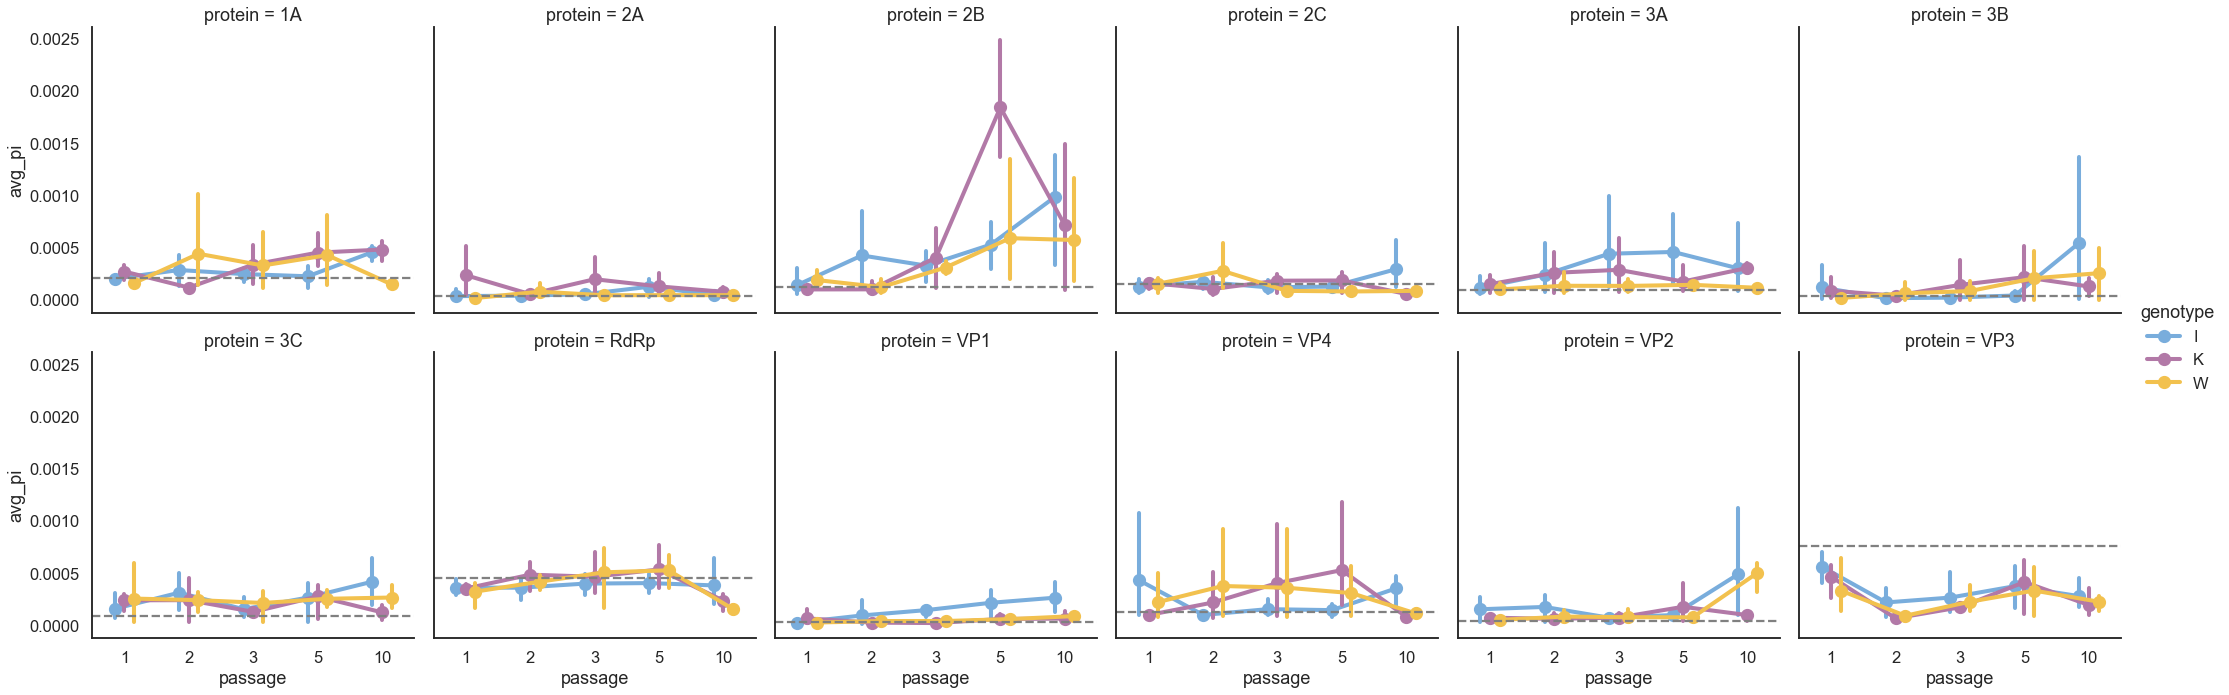

In [147]:
sns.set_context("talk") 


g = sns.catplot(df_pis_protein[(df_pis_protein['genotype']!='parental')], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='protein', 
                dodge=0.3,
                palette=our_color_palette, 
                col_order = proteins['CrPV'].keys(),
                col_wrap=6, 
                kind='point')


# Add a horizontal line to each plot
df_p0 = df_pis_protein[df_pis_protein['genotype']=='parental']
for ax in g.axes.flat:
    protein = ax.title.get_text().split("= ")[-1] 
    pi_p0 = df_p0[df_p0['protein']==protein]['avg_pi'].values[0]
    ax.axhline(y=pi_p0, color='gray', linestyle='--')


## now compare coding region to protein 2B

In [148]:
df_pi = pd.DataFrame() 

length_crpv = 9185

for sample in df['passage'].unique():
    df_temp = df[df['virus']== virus]
    df_temp = df_temp[df_temp['passage']==sample]
    protein_length = 1692 - 1279
    
    avg_pi_2B = df_temp[df_temp['site'].isin(list(range(1279,1692+1)))]['pi'].sum()/protein_length
    
    mean_pis = {'sample': sample,
                'genome_region': ["2B"],
                'avg_pi': avg_pi_2B, 
                    }
    df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
    # remaining regions only coding
    lenght = (1278 - 709) + (8902 - 1693)
    sum_pi = df_temp[df_temp['site'].isin(list(range(709,1278+1)))]['pi'].sum()
    sum_pi += df_temp[df_temp['site'].isin(list(range(1693,8902+1)))]['pi'].sum()
    
    mean_pis = {'sample': sample,
                'genome_region': ["~2B-coding"],
                'avg_pi': sum_pi/lenght, 
                    }
    df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
    # remaining regions full genome
    #lenght = length_crpv - protein_length
    #sum_pi = df_temp[df_temp['site'].isin(list(range(1,1278+1)))]['pi'].sum()
    #sum_pi += df_temp[df_temp['site'].isin(list(range(1693,length_crpv)))]['pi'].sum()
    
    #mean_pis = {'sample': sample,
    #            'genome_region': ["~2B-fullgenome"],
    #            'avg_pi': sum_pi/lenght, 
    #                }
    #df_pi = pd.concat([pd.DataFrame(mean_pis),df_pi], ignore_index=True)
    
    

In [149]:
df_pi['genotype'] = df_pi['sample'].str.split("_").str[0]
df_pi['passage'] = df_pi['sample'].str.split("_").str[1].str.split("p").str[-1].astype(int)
df_pi['rep'] = df_pi['genotype']+df_pi['sample'].str.split("_").str[-1]

In [150]:
df_pi[df_pi['genome_region']=='~2B-coding']

,sample,genome_region,avg_pi,genotype,passage,rep
0,W_p10_c,~2B-coding,0.000182,W,10,Wc
2,W_p5_c,~2B-coding,0.000286,W,5,Wc
4,W_p5_b,~2B-coding,0.000206,W,5,Wb
6,W_p5_a,~2B-coding,0.000282,W,5,Wa
8,I_p3_c,~2B-coding,0.000201,I,3,Ic
10,I_p3_b,~2B-coding,0.000210,I,3,Ib
12,I_p3_a,~2B-coding,0.000285,I,3,Ia
14,I_p10_c,~2B-coding,0.000248,I,10,Ic
16,I_p10_b,~2B-coding,0.000421,I,10,Ib
18,I_p10_a,~2B-coding,0.000388,I,10,Ia


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_36593/410583052.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pi[(df_pi['genotype']!='parental')],


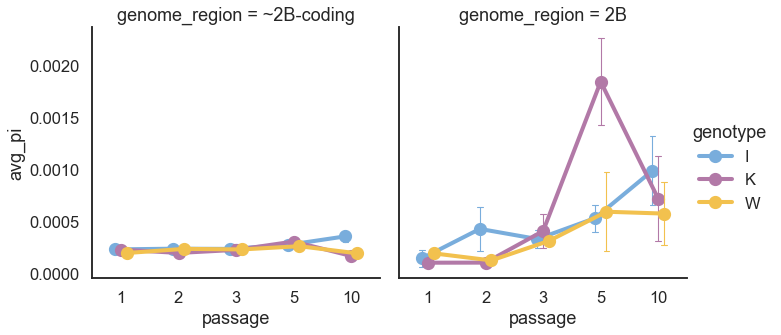

In [151]:
sns.set_context("talk") 
sns.set_style('white')


g = sns.catplot(df_pi[(df_pi['genotype']!='parental')], 
                x='passage', 
                y='avg_pi',
                hue='genotype', 
                col='genome_region', 
                palette=our_color_palette, 
                errorbar="se",
                errwidth=1.1, 
                  dodge=0.2,
                  capsize=0.1,
                kind='point')
#g.figure.savefig(f"/Users/lfuhrmann/Downloads/diversity_2B_vs_rest_of_coding_region.pdf")

In [152]:
df_pi = df_pi[df_pi['genotype']!='parental']

In [153]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


###  compare to coding region 

In [154]:
%%R -i df_pi 
library(lme4)


df_pi$pi_log <- log10(df_pi$avg_pi)

# Convert genotype to factor
df_pi$genome_region <- factor(df_pi$genome_region)
df_pi$genotype <- factor(df_pi$genotype)


# Relevel the genotype factor with W as reference
df_pi$genome_region <- relevel(df_pi$genome_region, ref = "~2B-coding")
df_pi$genotype <- relevel(df_pi$genotype, ref = "W")


/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [155]:
%%R 

model <- lmer(pi_log ~ genotype + passage + I(passage >= 10) + 
              genome_region + genotype:I(passage >= 10) + 
              genome_region:passage + (1|rep),
              data = df_pi)
summary(model)

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: pi_log ~ genotype + passage + I(passage >= 10) + genome_region +  
    genotype:I(passage >= 10) + genome_region:passage + (1 |      rep)
   Data: df_pi

REML criterion at convergence: 43.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6455 -0.4695  0.1472  0.4566  2.5446 

Random effects:
 Groups   Name        Variance  Std.Dev.
 rep      (Intercept) 5.153e-20 2.27e-10
 Residual             7.077e-02 2.66e-01
Number of obs: 90, groups:  rep, 9

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                    -3.87753    0.09219 -42.062
genotypeI                       0.05697    0.07679   0.742
genotypeK                       0.03984    0.07679   0.519
passage                         0.07909    0.02295   3.446
I(passage >= 10)TRUE           -0.71420    0.19586  -3.647
genome_region2B                -0.18387    0.09277  -1.982
genotypeI:I(passage >= 10)TRUE  0.21724    0.17172  

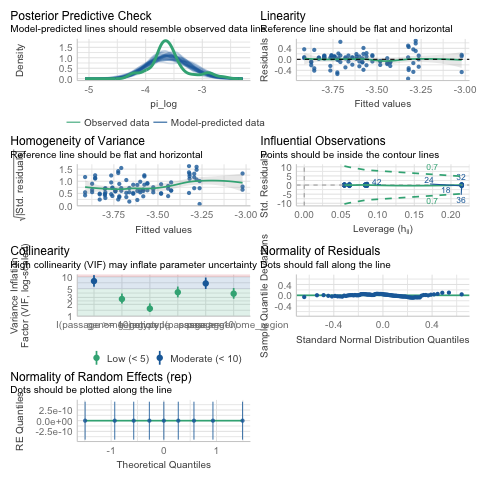

In [157]:
%%R

# Check model assumptions
library(performance)
check_model(model)

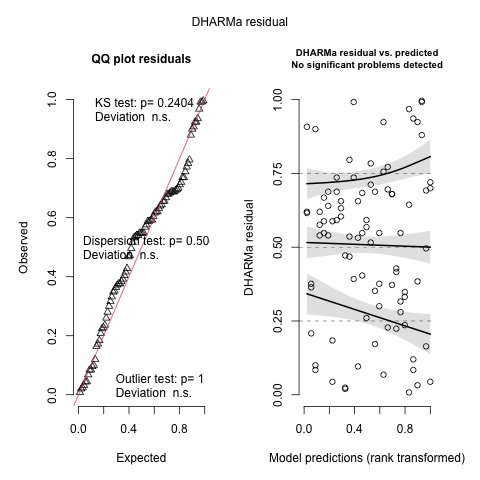

In [158]:
%%R

library(DHARMa)
simulationOutput <- simulateResiduals(model)
plot(simulationOutput)

## take mean over passage

In [162]:
df_pi_summary = df_pi[
    ['genome_region', 'avg_pi', 'genotype', 'passage', 'rep']
].groupby(by=['genotype', 'rep', 'genome_region']).mean().reset_index()

In [163]:
df_pi_summary

,genotype,rep,genome_region,avg_pi,passage
0,I,Ia,2B,0.000501,4.2
1,I,Ia,~2B-coding,0.000283,4.2
2,I,Ib,2B,0.000371,4.2
3,I,Ib,~2B-coding,0.000266,4.2
4,I,Ic,2B,0.000571,4.2
5,I,Ic,~2B-coding,0.000239,4.2
6,K,Ka,2B,0.000597,4.2
7,K,Ka,~2B-coding,0.000218,4.2
8,K,Kb,2B,0.000672,4.2
9,K,Kb,~2B-coding,0.000176,4.2


/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_36593/3385133212.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.1}` instead.

  g = sns.catplot(df_pi_summary,


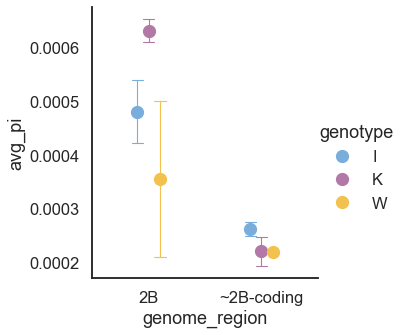

In [167]:
sns.set_context("talk") 
sns.set_style('white')


g = sns.catplot(df_pi_summary, 
                y='avg_pi',
                hue='genotype', 
                x='genome_region', 
                palette=our_color_palette, 
                errorbar="se",
                linestyle='',
                errwidth=1.1, 
                dodge=0.2,
                capsize=0.1,
                kind='point')


In [182]:
df_pi_summary

,genotype,rep,genome_region,avg_pi,passage
0,I,Ia,2B,0.000501,4.2
1,I,Ia,~2B-coding,0.000283,4.2
2,I,Ib,2B,0.000371,4.2
3,I,Ib,~2B-coding,0.000266,4.2
4,I,Ic,2B,0.000571,4.2
5,I,Ic,~2B-coding,0.000239,4.2
6,K,Ka,2B,0.000597,4.2
7,K,Ka,~2B-coding,0.000218,4.2
8,K,Kb,2B,0.000672,4.2
9,K,Kb,~2B-coding,0.000176,4.2


In [171]:
%%R -i df_pi_summary 

library(tidyverse)
library(ggpubr)
library(rstatix)

# Two-way mixed ANOVA test
res.aov <- anova_test(
  data = df_pi_summary, 
    dv = avg_pi, 
    wid = rep,
    between = genotype, 
    within = genome_region
  )
get_anova_table(res.aov)

/Users/lfuhrmann/Library/Python/3.9/lib/python/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


ANOVA Table (type II tests)

                  Effect DFn DFd      F     p p<.05   ges
1               genotype   2   6  2.338 0.178       0.275
2          genome_region   1   6 22.048 0.003     * 0.654
3 genotype:genome_region   2   6  2.237 0.188       0.277


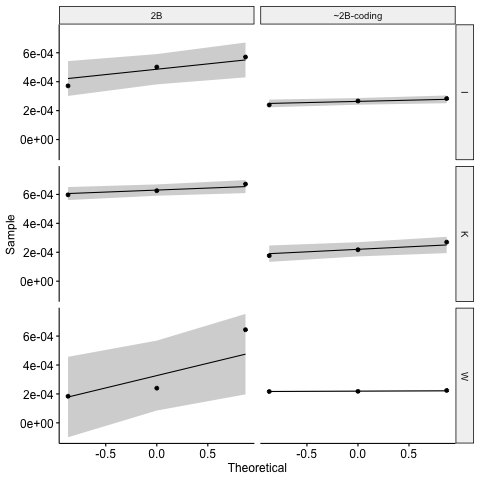

In [175]:
%%R

ggqqplot(df_pi_summary, "avg_pi")+
  facet_grid (genotype~genome_region)

In [176]:
%%R 

library(rstatix)
library(dplyr)
df_pi_summary %>%
  group_by(genotype) %>%
  levene_test(avg_pi~genome_region)

# A tibble: 3 × 5
  genotype   df1   df2 statistic     p
  <chr>    <int> <int>     <dbl> <dbl>
1 I            1     4    1.81   0.250
2 K            1     4    0.0926 0.776
3 W            1     4    1.42   0.299


In [177]:
%%R 

df_pi_summary %>%
  group_by(genotype, genome_region) %>%
  summarise(var(avg_pi)) %>%
  as.data.frame()

`summarise()` has grouped output by 'genotype'. You can override using the
`.groups` argument.
  genotype genome_region  var(avg_pi)
1        I            2B 1.023746e-08
2        I    ~2B-coding 4.976408e-10
3        K            2B 1.417125e-09
4        K    ~2B-coding 2.203776e-09
5        W            2B 6.303905e-08
6        W    ~2B-coding 1.581563e-11


In [181]:
%%R 

box_m(df_pi_summary[ "avg_pi"], df_pi_summary$genotype)

# A tibble: 1 × 4
  statistic p.value parameter method                                            
      <dbl>   <dbl>     <dbl> <chr>                                             
1      1.18   0.554         2 Box's M-test for Homogeneity of Covariance Matric…
